<a href="https://colab.research.google.com/github/DJCordhose/ml-workshop/blob/master/notebooks/tf2/fashion-mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classify Fashion-MNIST with a simple CNN

<br> Original by Margaret Maynard-Reid, 4/24/2018
<br> **Oringal Notebook**: https://github.com/margaretmz/deep-learning/blob/master/fashion_mnist_keras.ipynb
<br> **Oringal Tutorial**: https://medium.com/tensorflow/hello-deep-learning-fashion-mnist-with-keras-50fcff8cd74a


![alt text](https://github.com/margaretmz/deep-learning/blob/master/images/modern%20dl_fash-mnist_keras.png?raw=1)

In [1]:
# Gives us a well defined version of tensorflow

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
  !pip install -q lrcurve
except Exception:
  pass

In [10]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [11]:
# https://github.com/AndreasMadsen/python-lrcurve
from lrcurve import KerasLearningCurve

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (20, 8)
mpl.rcParams['axes.titlesize'] = 24
mpl.rcParams['axes.labelsize'] = 20

## Load and visualize the data

In [3]:
# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


x_train shape: (60000, 28, 28, 1) y_train shape: (60000,)
60000 train set
10000 test set
y = 2 Pullover


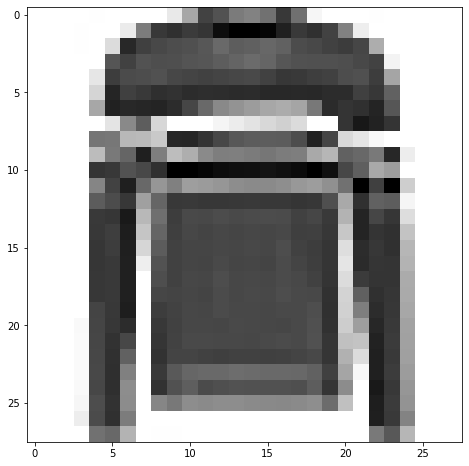

In [16]:
# Print training set shape - note there are 60,000 training data of image size of 28x28, 60,000 train labels)
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training and test datasets
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

# Image index, you can pick any number between 0 and 59,999
img_index = 5
# y_train contains the lables, ranging from 0 to 9
label_index = y_train[img_index]
# Print the label, for example 2 Pullover
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
# # Show one of the images from the training dataset
plt.imshow(x_train[img_index], cmap='binary');

In [7]:
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

x_train.shape

(60000, 28, 28, 1)

In [8]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

model = tf.keras.Sequential()

model.add(Conv2D(filters=32, kernel_size=2, activation='relu', input_shape=(28,28,1))) 
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 27, 27, 32)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0

In [9]:
%%time

BATCH_SIZE=5000
EPOCHS = 15

model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=EPOCHS, 
                    batch_size=BATCH_SIZE, 
                    callbacks=[KerasLearningCurve()]
                    verbose=0)

Epoch 1/15
10/10 [==============================] - 24s 1s/step - loss: 40.0578 - accuracy: 0.2772 - val_loss: 1.6919 - val_accuracy: 0.5274
Epoch 2/15
10/10 [==============================] - 8s 786ms/step - loss: 2.7441 - accuracy: 0.3816 - val_loss: 1.3567 - val_accuracy: 0.5247
Epoch 3/15
10/10 [==============================] - 8s 788ms/step - loss: 1.7588 - accuracy: 0.3740 - val_loss: 1.2750 - val_accuracy: 0.5707
Epoch 4/15
10/10 [==============================] - 8s 786ms/step - loss: 1.5865 - accuracy: 0.4209 - val_loss: 1.1089 - val_accuracy: 0.6062
Epoch 5/15
10/10 [==============================] - 8s 786ms/step - loss: 1.4390 - accuracy: 0.4806 - val_loss: 1.0026 - val_accuracy: 0.6487
Epoch 6/15
10/10 [==============================] - 8s 787ms/step - loss: 1.3298 - accuracy: 0.5306 - val_loss: 0.9545 - val_accuracy: 0.6712
Epoch 7/15
10/10 [==============================] - 8s 786ms/step - loss: 1.2286 - accuracy: 0.5641 - val_loss: 0.9433 - val_accuracy: 0.6867
Epoch 8

In [12]:
train_loss, train_accuracy = model.evaluate(x_train, y_train, batch_size=BATCH_SIZE)
train_accuracy

12/12 [==============================] - 3s 250ms/step - loss: 0.6872 - accuracy: 0.7718


0.7718166708946228

In [13]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)
test_accuracy

2/2 [==============================] - 1s 255ms/step - loss: 0.7445 - accuracy: 0.7594


0.7594000101089478

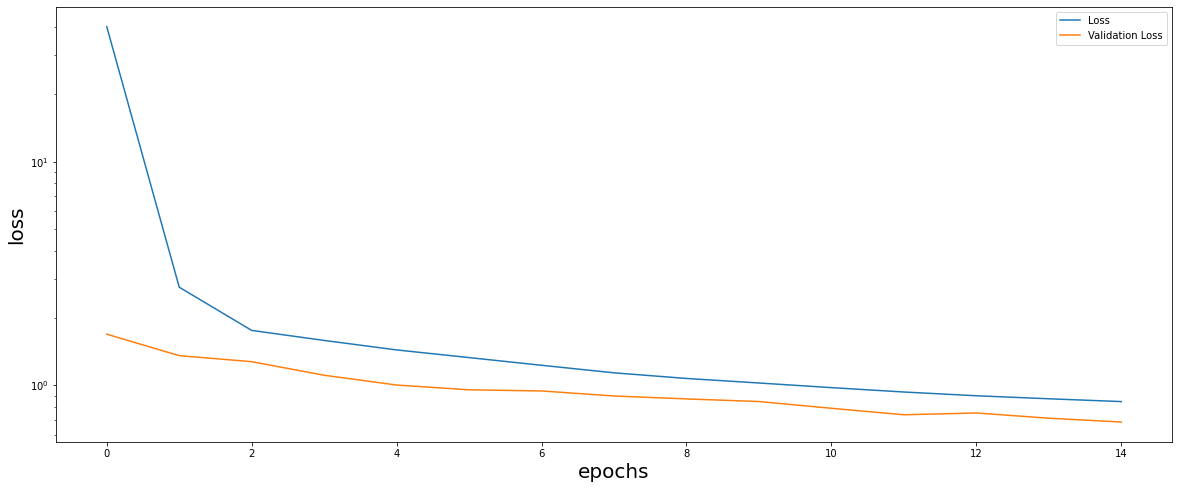

In [18]:
plt.xlabel('epochs')
plt.ylabel('loss')

plt.yscale('log')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Loss', 'Validation Loss']);

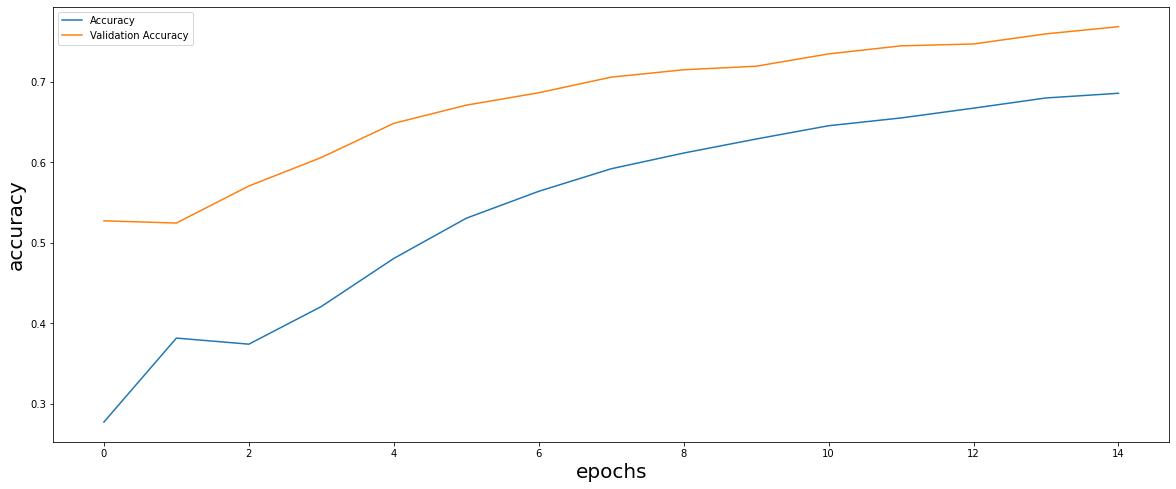

In [19]:
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Accuracy', 'Validation Accuracy']);

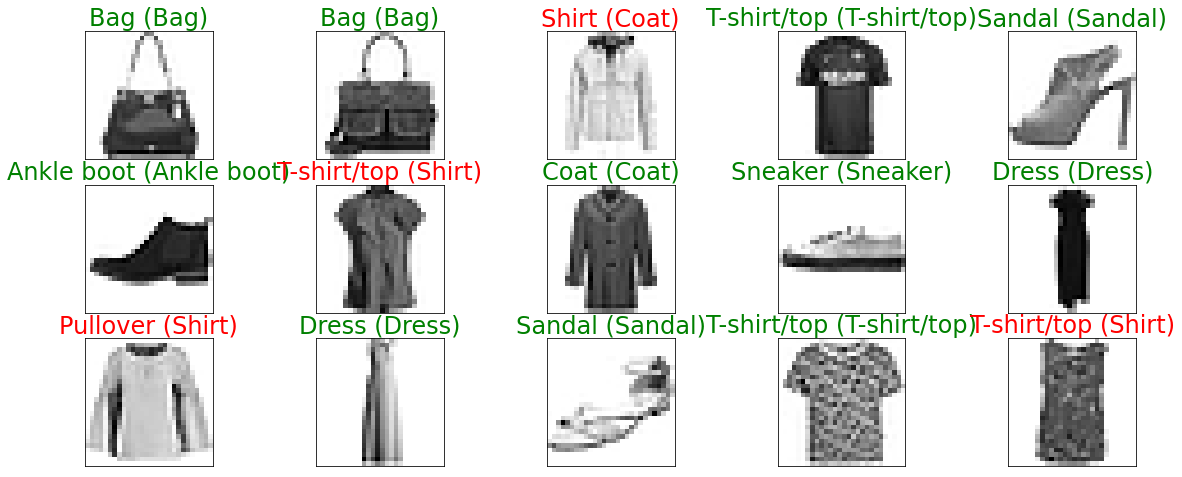

In [22]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]), cmap='binary')
    predict_index = np.argmax(y_hat[index])
    true_index = y_test[index]
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))